# EDA Labelled Data
This notebook explores the second impedance dataset. This time we got labelled data according to the cell coverage of the bead. We have empty beads, low covered, medium covered and highly covered Beads.
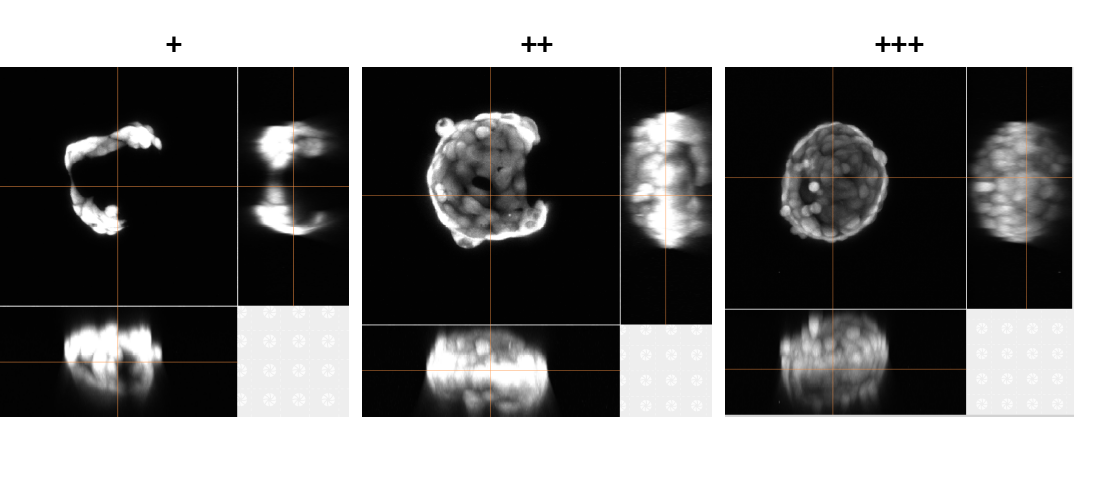

We use the "Betrag" of the impedance as main metric. Each column corresponds to a frequncy and each row to the impedance value of a measurement. In the first step we want to:
- seperate the data into numeric and nominal variables
- sanity check 
- label encode the target variable

## Background data aggregation - how did we do it?
The raw data is generated by measuring the electrical impedance of the cell. Therefore, specialized electrodes induce curent to the beads (where the cells grow). The impedance differs depending on cell migration. Thus, cell impedance can be used as a marker of cell migration.

The raw data files are in csv format. Each measurement has its one file. Each file consits of 6 columns, corresponding the the spatial frequency measurement (see image below). We aggregate these 6 measurements per frequency by the mean.

Each files has two section one for the "Betrag" and one for the "Phasenwinkel". In these analysis we focus only on the "Betrag". We combine all csv files to one large files and store meta data (coverage state, experiment run, etc in extra columns)
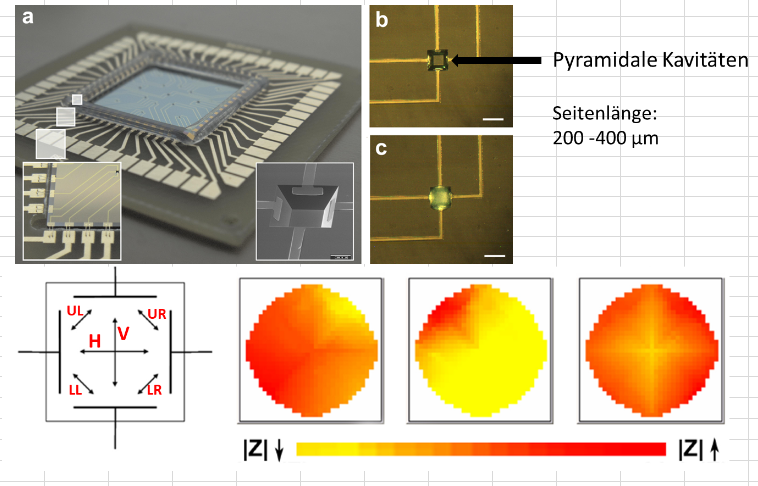

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/processed/betrag_combined_0.csv')

In [3]:
df.head()


500.000000  601.132000  722.720000  868.900000  1044.648000  1255.943000  \
0   -7.179474   -7.450125   -4.417737   -6.485126    -4.512406    -6.968506   
1   -6.271736   -7.971743   -5.948047   -6.541946    -6.046966    -7.083067   
2  -21.012076    1.232146   19.579894   -6.618786    -5.916519    -6.562392   
3    5.551396   -0.917551    5.484907    1.290056     3.284358     1.823678   
4    4.000105    3.976715    6.069176    3.054561     2.317450    -0.559891   

   1509.976000  1815.390000  2182.579000  2624.037000  ...  1655655.607000  \
0    -3.749690    -5.620006    -4.782567    -4.949482  ...       29.959587   
1    -5.768336    -4.665223    -5.411402    -4.882813  ...       33.494902   
2    -1.220457    -6.915504     0.150487    -4.087798  ...       21.554944   
3     1.541996     2.971513     1.627372     0.785321  ...       18.125484   
4    -0.255372     0.469859     0.725878     1.549762  ...       -4.818111   

   1990535.853000  2393150.462000  2877199.687000  3459154.855000  \
0       29.602886       27.558236       25.273806       20.947400   
1       31.850661       31.054172       26.487576       23.204498   
2       17.927727       15.713433       14.426825       13.375134   
3       14.775380       13.482663       10.708193        8.906992   
4       -4.502048       -5.111405       -5.844929       -4.954850   

   4158818.856000  5000000.000000  \
0       17.193457       14.491506   
1       19.585654       17.528195   
2       11.424516        8.128726   
3        9.828735        6.626761   
4       -5.306759       -5.802691   

                                            filename       coverage  \
0  data/raw/highlyCovered_7/12.01.2022_08.29.30_4...  highlyCovered   
1  data/raw/highlyCovered_7/12.01.2022_08.30.32_4...  highlyCovered   
2  data/raw/mediumCovered_4/11.30.2022_08.23.24_2...  mediumCovered   
3  data/raw/mediumCovered_2/09.14.2022_08.06.29_M...  mediumCovered   
4  data/raw/mediumCovered_2/09.14.2022_08.03.00_M...  mediumCovered   

   experiment  
0           7  
1           7  
2           4  
3           2  
4           2  

[5 rows x 54 columns]

In [4]:

df_features = df.iloc[:,0:-3]

df_features.head()

500.000000  601.132000  722.720000  868.900000  1044.648000  1255.943000  \
0   -7.179474   -7.450125   -4.417737   -6.485126    -4.512406    -6.968506   
1   -6.271736   -7.971743   -5.948047   -6.541946    -6.046966    -7.083067   
2  -21.012076    1.232146   19.579894   -6.618786    -5.916519    -6.562392   
3    5.551396   -0.917551    5.484907    1.290056     3.284358     1.823678   
4    4.000105    3.976715    6.069176    3.054561     2.317450    -0.559891   

   1509.976000  1815.390000  2182.579000  2624.037000  ...  952730.359000  \
0    -3.749690    -5.620006    -4.782567    -4.949482  ...      44.899848   
1    -5.768336    -4.665223    -5.411402    -4.882813  ...      47.184253   
2    -1.220457    -6.915504     0.150487    -4.087798  ...      28.229097   
3     1.541996     2.971513     1.627372     0.785321  ...      22.428472   
4    -0.255372     0.469859     0.725878     1.549762  ...      -4.650811   

   1145433.826000  1377114.352000  1655655.607000  1990535.853000  \
0       43.428812       37.545503       29.959587       29.602886   
1       41.527098       38.896625       33.494902       31.850661   
2       28.468683       22.583171       21.554944       17.927727   
3       19.475467       17.246760       18.125484       14.775380   
4       -4.682671       -5.005204       -4.818111       -4.502048   

   2393150.462000  2877199.687000  3459154.855000  4158818.856000  \
0       27.558236       25.273806       20.947400       17.193457   
1       31.054172       26.487576       23.204498       19.585654   
2       15.713433       14.426825       13.375134       11.424516   
3       13.482663       10.708193        8.906992        9.828735   
4       -5.111405       -5.844929       -4.954850       -5.306759   

   5000000.000000  
0       14.491506  
1       17.528195  
2        8.128726  
3        6.626761  
4       -5.802691  

[5 rows x 51 columns]

In [5]:
df_meta = df.iloc[:,-3:df.shape[1]]
df_meta.head()

filename       coverage  \
0  data/raw/highlyCovered_7/12.01.2022_08.29.30_4...  highlyCovered   
1  data/raw/highlyCovered_7/12.01.2022_08.30.32_4...  highlyCovered   
2  data/raw/mediumCovered_4/11.30.2022_08.23.24_2...  mediumCovered   
3  data/raw/mediumCovered_2/09.14.2022_08.06.29_M...  mediumCovered   
4  data/raw/mediumCovered_2/09.14.2022_08.03.00_M...  mediumCovered   

   experiment  
0           7  
1           7  
2           4  
3           2  
4           2

In [6]:
split = df_meta.filename.str.split('_').str[-1]
len(split.unique())


73

In [7]:
df_target = df['coverage']
df_target.head()

0    highlyCovered
1    highlyCovered
2    mediumCovered
3    mediumCovered
4    mediumCovered
Name: coverage, dtype: object

In [8]:
df.coverage.value_counts()

highlyCovered     26
emptyBeads        23
mediumCovered     16
lightlyCovered     9
Name: coverage, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
target_numeric = le.fit_transform(df_target)
lookup_helper = le.inverse_transform(target_numeric)
lookup = {}
for label, friendlyname in zip(target_numeric, lookup_helper):
    lookup[friendlyname] = label

In [10]:
lookup

{'highlyCovered': 1, 'mediumCovered': 3, 'emptyBeads': 0, 'lightlyCovered': 2}

In [11]:
lookup_helper

array(['highlyCovered', 'highlyCovered', 'mediumCovered', 'mediumCovered',
       'mediumCovered', 'mediumCovered', 'mediumCovered', 'emptyBeads',
       'emptyBeads', 'emptyBeads', 'emptyBeads', 'emptyBeads',
       'emptyBeads', 'highlyCovered', 'highlyCovered', 'highlyCovered',
       'highlyCovered', 'highlyCovered', 'lightlyCovered',
       'mediumCovered', 'highlyCovered', 'highlyCovered', 'emptyBeads',
       'emptyBeads', 'emptyBeads', 'emptyBeads', 'emptyBeads',
       'emptyBeads', 'emptyBeads', 'emptyBeads', 'emptyBeads',
       'emptyBeads', 'emptyBeads', 'emptyBeads', 'lightlyCovered',
       'lightlyCovered', 'mediumCovered', 'mediumCovered',
       'highlyCovered', 'highlyCovered', 'emptyBeads', 'emptyBeads',
       'mediumCovered', 'highlyCovered', 'highlyCovered', 'highlyCovered',
       'highlyCovered', 'highlyCovered', 'highlyCovered', 'highlyCovered',
       'highlyCovered', 'highlyCovered', 'highlyCovered', 'mediumCovered',
       'mediumCovered', 'mediumCovered', 

In [12]:
target_numeric

array([1, 1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 3, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 3, 1, 1, 0, 0, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 3, 3, 3, 1, 1])

# Visual Exploration
So we have 4 different dataframes now:
- df: all data
- df_features: numeric data of impedance measurement
- df_target: status of bead cell coverage
- df_meta: additional meta data

Now we want to explore some describitve stats and check for first differences between the coverage states

In [13]:
stats_df = df_features.describe()
stats_df.columns = stats_df.columns.astype(float)

<AxesSubplot: >

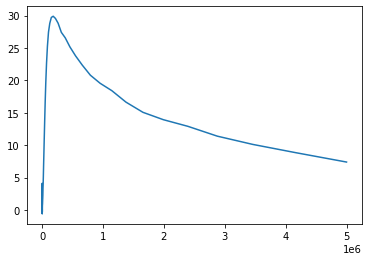

In [14]:
stats_df.T['mean'].plot()

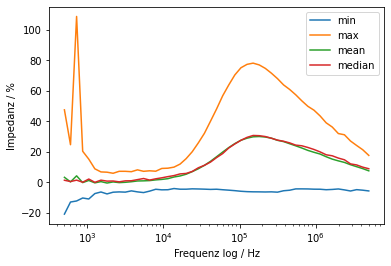

In [15]:
import matplotlib.pyplot as plt
plt.plot(stats_df.T['min'], label='min')
plt.plot(stats_df.T['max'], label='max')
plt.plot(stats_df.T['mean'], label='mean')
plt.plot(stats_df.T['50%'], label='median')
plt.xscale('log')
plt.legend()
plt.xlabel('Frequenz log / Hz')
plt.ylabel('Impedanz / %')
plt.show()

In [16]:
type(df_features.index[0])

int

In [17]:
df_features.columns

Index(['500.000000', '601.132000', '722.720000', '868.900000', '1044.648000',
       '1255.943000', '1509.976000', '1815.390000', '2182.579000',
       '2624.037000', '3154.787000', '3792.888000', '4560.054000',
       '5482.391000', '6591.284000', '7924.466000', '9527.304000',
       '11454.338000', '13771.144000', '16556.556000', '19905.359000',
       '23931.505000', '28771.997000', '34591.549000', '41588.189000',
       '50000.000000', '60113.222000', '72271.989000', '86890.041000',
       '104464.807000', '125594.322000', '150997.586000', '181539.027000',
       '218257.916000', '262403.730000', '315478.672000', '379288.788000',
       '456005.420000', '548239.098000', '659128.369000', '792446.596000',
       '952730.359000', '1145433.826000', '1377114.352000', '1655655.607000',
       '1990535.853000', '2393150.462000', '2877199.687000', '3459154.855000',
       '4158818.856000', '5000000.000000'],
      dtype='object')

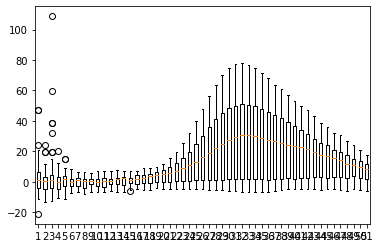

In [18]:
plt.boxplot(df_features)
plt.show()

In [19]:
df_mean = df.groupby('coverage').mean()
df_mean.head()
del df_mean['experiment']

<AxesSubplot: >

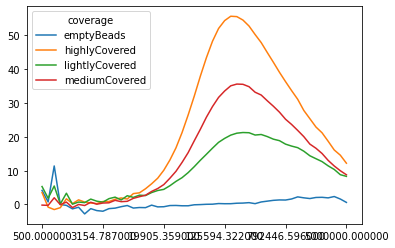

In [20]:
df_mean.T.plot()

<AxesSubplot: >

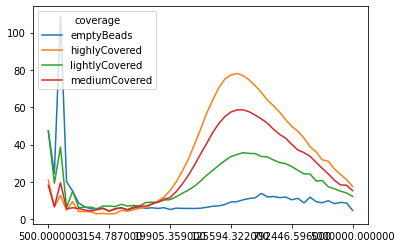

In [21]:
df_max = df.groupby('coverage').max()
del df_max['filename']
del df_max['experiment']
df_max.T.plot()

<AxesSubplot: >

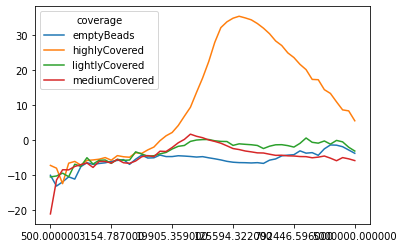

In [22]:
df_min = df.groupby('coverage').min()
del df_min['filename']
del df_min['experiment']
df_min.T.plot()

In [23]:
df.coverage

0     highlyCovered
1     highlyCovered
2     mediumCovered
3     mediumCovered
4     mediumCovered
          ...      
69    mediumCovered
70    mediumCovered
71    mediumCovered
72    highlyCovered
73    highlyCovered
Name: coverage, Length: 74, dtype: object

In [24]:
df_features

500.000000  601.132000  722.720000  868.900000  1044.648000  1255.943000  \
0    -7.179474   -7.450125   -4.417737   -6.485126    -4.512406    -6.968506   
1    -6.271736   -7.971743   -5.948047   -6.541946    -6.046966    -7.083067   
2   -21.012076    1.232146   19.579894   -6.618786    -5.916519    -6.562392   
3     5.551396   -0.917551    5.484907    1.290056     3.284358     1.823678   
4     4.000105    3.976715    6.069176    3.054561     2.317450    -0.559891   
..         ...         ...         ...         ...          ...          ...   
69   -7.782043   -7.081543   -7.588802   -6.987287    -4.802589    -6.130185   
70  -11.032979  -11.359837   -8.419193   -8.448271    -7.482686    -6.964360   
71   -7.738651   -8.874097   -6.670376   -6.907131    -7.057232    -6.232994   
72   -4.394696   -6.988794   -5.148447   -6.513846    -4.925603    -5.927631   
73    3.365848    3.186188    0.132976    2.299884     3.298495     2.523841   

    1509.976000  1815.390000  2182.579000  2624.037000  ...  952730.359000  \
0     -3.749690    -5.620006    -4.782567    -4.949482  ...      44.899848   
1     -5.768336    -4.665223    -5.411402    -4.882813  ...      47.184253   
2     -1.220457    -6.915504     0.150487    -4.087798  ...      28.229097   
3      1.541996     2.971513     1.627372     0.785321  ...      22.428472   
4     -0.255372     0.469859     0.725878     1.549762  ...      -4.650811   
..          ...          ...          ...          ...  ...            ...   
69    -6.491814    -5.537928    -5.407808    -5.766983  ...      19.361153   
70    -5.789229    -6.632048    -6.057481    -5.765283  ...      20.146204   
71    -5.887235    -7.755049    -5.570962    -6.053162  ...      28.758920   
72    -5.120558    -5.357719    -4.246194    -4.330665  ...      33.247869   
73     1.705207     1.906436     2.260104     2.674172  ...      38.795838   

    1145433.826000  1377114.352000  1655655.607000  1990535.853000  \
0        43.428812       37.545503       29.959587       29.602886   
1        41.527098       38.896625       33.494902       31.850661   
2        28.468683       22.583171       21.554944       17.927727   
3        19.475467       17.246760       18.125484       14.775380   
4        -4.682671       -5.005204       -4.818111       -4.502048   
..             ...             ...             ...             ...   
69       18.736760       15.899181       14.026937       15.149922   
70       17.843896       15.961012       15.397012       13.434742   
71       27.383475       23.056955       20.884006       19.424028   
72       30.393507       28.252021       25.032285       23.557385   
73       36.208071       34.244053       28.987405       27.393239   

    2393150.462000  2877199.687000  3459154.855000  4158818.856000  \
0        27.558236       25.273806       20.947400       17.193457   
1        31.054172       26.487576       23.204498       19.585654   
2        15.713433       14.426825       13.375134       11.424516   
3        13.482663       10.708193        8.906992        9.828735   
4        -5.111405       -5.844929       -4.954850       -5.306759   
..             ...             ...             ...             ...   
69       13.344001       10.516982       10.103610        6.843809   
70       13.359980       12.252632        8.046465        5.906721   
71       18.659515       16.983544       13.351169       11.952238   
72       21.484144       18.390306       17.379502       14.125443   
73       23.787818       20.983504       17.297170       16.174856   

    5000000.000000  
0        14.491506  
1        17.528195  
2         8.128726  
3         6.626761  
4        -5.802691  
..             ...  
69        6.034077  
70        7.299646  
71        9.472145  
72       12.552143  
73       16.680118  

[74 rows x 51 columns]

highlyCovered
mediumCovered
emptyBeads
lightlyCovered


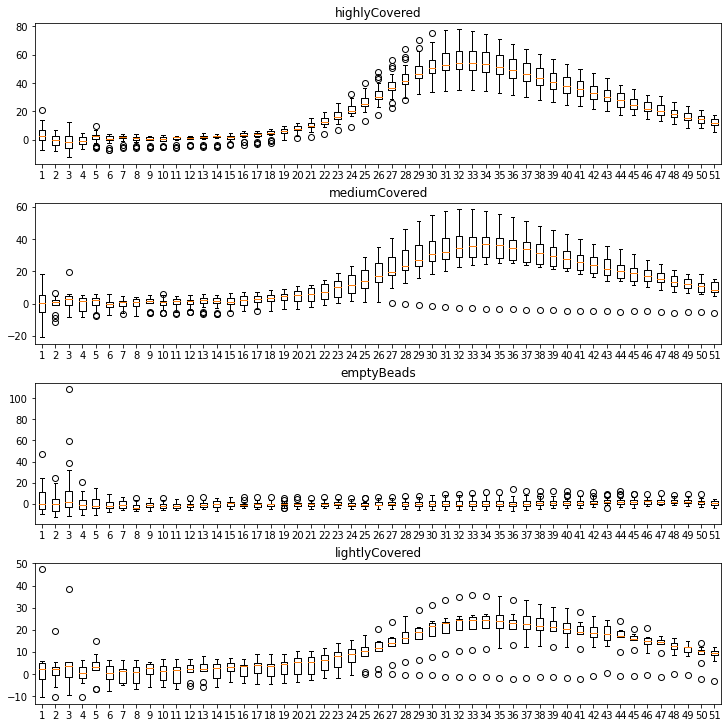

In [25]:
fig, ax = plt.subplots(4,1, figsize=(10,10), constrained_layout=True)
targets = df_target.unique()


for i, target in enumerate(targets):
    print(target)
    ax[i].boxplot(df_features[df['coverage'] == target])
    ax[i].set_title(target)
    

In [26]:
lookup.keys()

dict_keys(['highlyCovered', 'mediumCovered', 'emptyBeads', 'lightlyCovered'])

In [27]:
df_meta['experiment'].unique()

array([7, 4, 2, 3, 0, 5, 1, 6, 8])

### Per Experiment
Now I group the data according to the coverage and split this subgroups to different experiment runs.
Background: The lab scientist did not perform just one experiment per coverage state. There are up to 8 different test series per coverage state. To check for batch effects, I plot the "fingerprint" of each experiment.

In [28]:
targets

array(['highlyCovered', 'mediumCovered', 'emptyBeads', 'lightlyCovered'],
      dtype=object)

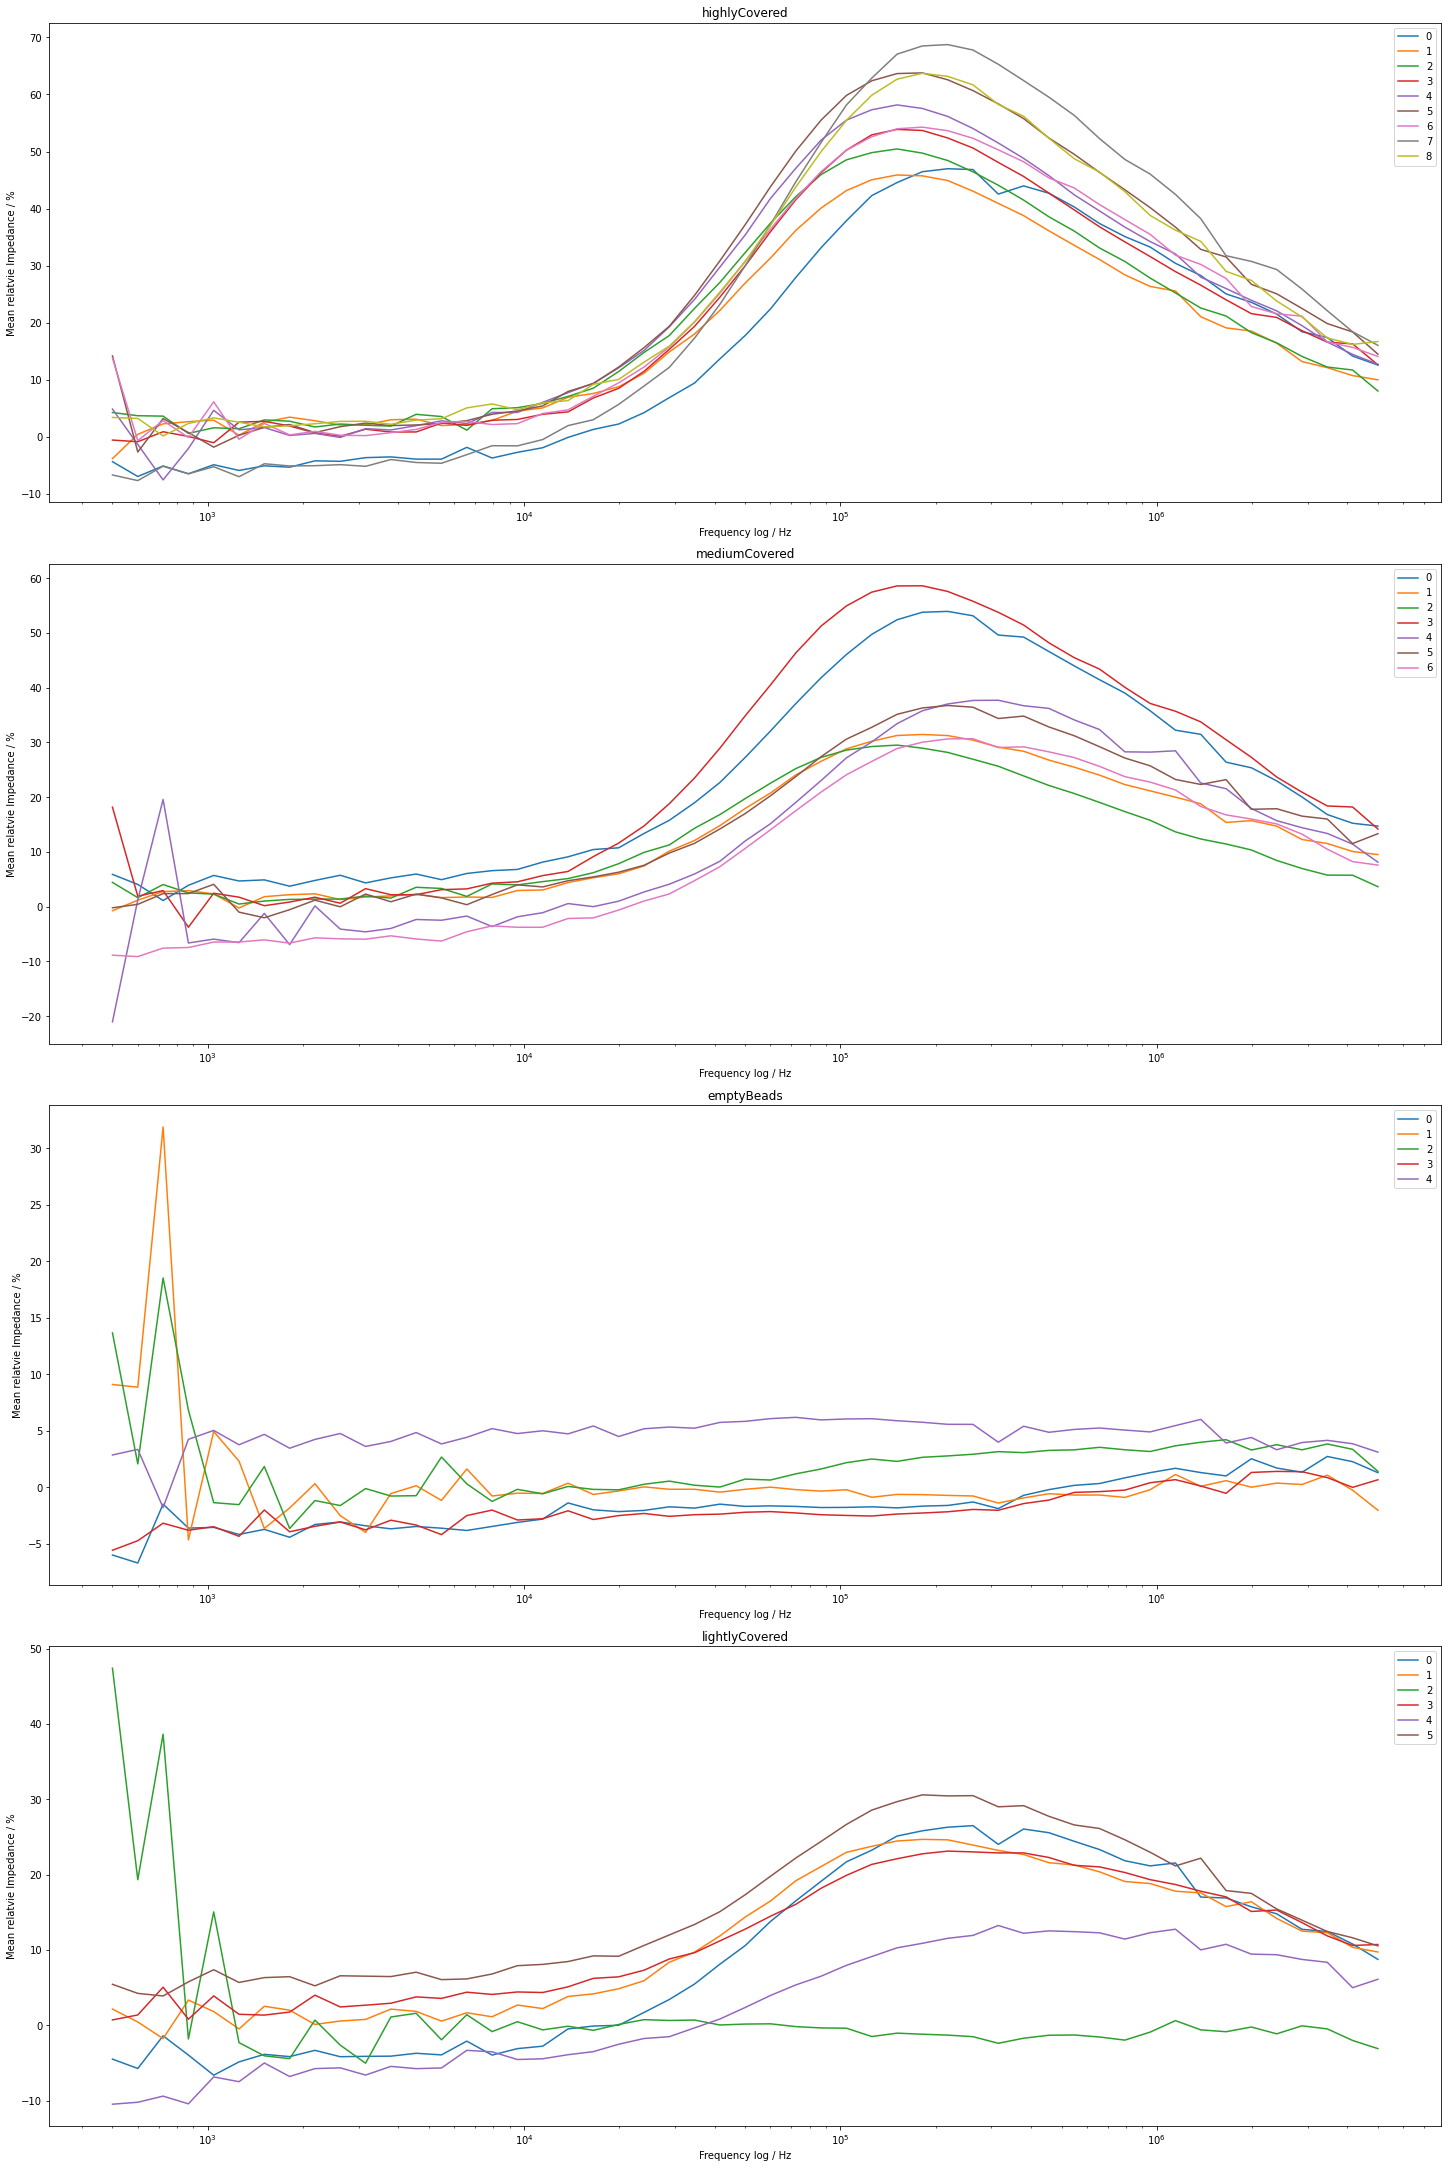

In [29]:
fig, ax = plt.subplots(4,1, figsize=(20,30), constrained_layout=True)
for i, target in enumerate(targets):
    cur_df = df[df['coverage'] == target]
    del cur_df['filename']
    del cur_df['coverage']
    plot_df = cur_df.groupby('experiment').mean()
    plot_df.columns = plot_df.columns.astype(float)
    ax[i].set_title(target)
    ax[i].set_ylabel('Mean relatvie Impedance / %')
    ax[i].set_xscale('log')
    ax[i].set_xlabel('Frequency log / Hz')
    ax[i].plot(plot_df.T, label=plot_df.index)
    ax[i].legend()


## Recap visualization
The key takeaways from this first visual analysis are:
- We can observe a fignerprint depending on the cell coverage of the beads
- There seem to be some noise on the lower frequencies
- There seem to be differences in the experiments within one coverage state (batch effects)

### Next Steps
- unsupervised learning: Cluster data and check overlay of coverage states and clusters
- supervised learning: predict cluster (should be easy, because we see clear differences in "fingerprint" of different coverage states)
- Think of more fine grained coverage prediction based

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [31]:
X = StandardScaler().fit_transform(df_features)

In [32]:
pca = PCA(n_components=2)
pca_comp = pca.fit(X)

In [33]:
pca_df = pd.DataFrame(pca_comp.transform(X), columns=["PCA1", "PCA2"])
pca_df['coverage'] = df_meta['coverage']

In [34]:
targets[0]

'highlyCovered'

In [35]:
df['PCA1'] = pca_df['PCA1']
df['PCA2'] = pca_df['PCA2']
df['max'] = df_features.max(axis=1)
df['index'] = df.index
max_rank = df_features.max(axis=1).rank().astype(int)
df['max_rank'] = max_rank
df['max_rank_perc'] = df_features.max(axis=1).rank(pct=True)


SyntaxError: invalid syntax (2763450079.py, line 9)

In [ ]:
df['max_quantile'] = pd.qcut(df['max'], q=[0, .25, .75, 1], labels=['<25%','25-75', '>75'])

In [ ]:
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='coverage', style='max_quantile')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [ ]:
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='coverage',size='max', sizes=(20,200), legend='brief')

# plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [ ]:
for target in targets:
    plt.scatter(pca_df[pca_df.coverage == target]["PCA1"], pca_df[pca_df.coverage==target]["PCA2"], label=target,
                alpha = df_meta[]
               )
    plt.legend()


In [ ]:
# To investigate if some points are really outliers and should not belong to the cluster, or if the clustering algo 
# is not working properly, we plot information about the max impedance value. The idea behind this is that
# we've seen before that the max value seems to be a key discriminator between the different coverage states, when 
# averaging over all samples, but that there are differences in the samples
import numpy as np
max_rank = df_features.max(axis=1).rank().astype(int)
df_meta['max_rank'] = max_rank
for target in targets:
    sub_df = df_features[df_meta.coverage == target]
#     plt.scatter(range(0,sub_df.shape[0]), sub_df.max(axis=1), label=target)
    plt.plot(np.zeros_like(np.arange(sub_df.shape[0])),sub_df.max(axis=1), label=target, ls='dotted')
    plt.legend()
    plt.xlabel('')

In [ ]:
import seaborn as sns
df['max'] = df_features.max(axis=1)
df['index'] = df.index
sns.scatterplot(x='index', y='max', hue='coverage', data=df)

In [ ]:
sns.stripplot(data=df, x='coverage', y='max', hue='coverage')

In [ ]:
sns.stripplot(data=df, y='max', hue='coverage')

In [ ]:
## get rank and percentile group of max values
df_meta['max_rank']
df_meta['max'] = df_features.max(axis=1)
df_meta['max']
plt.boxplot(df_meta['max'])
plt.show()

## Plots from Scripts
In the first analysis, i've already wrote scripts to generate plots for unsupervised clustering as shown as folows:
1. PCA 2-dim colored by coverage
2. PCA 3-dim colored by coverage
3. Explained Variance by PCA
4. T-SNE colored by coverage
5. Latent Space of an Autoencoder - colored by coverage
6. Reconstruction loss of autoencoder

### 1. PCA 2-d
- cluster between highly and empty
- meidum more in empyt cluster than lightly

![tite](figures/pca_betrag_2.png)

#### With max impedance
Here I've added information about the maximal impedance value of the samples
- I've used the max impedance as size of the points
- I've used different annotations corresponding the the quantile of the max impedance of the samples

The goal was to see a connection betwwen cluster outlieres and overlays and the max impedance
![tite](figures/pca_max_markers_betrag_2.png)
![title](figures/pca_max_size_betrag_2.png)

###  3. PCA Explained Variance
- first two components explain most of the variance


### 4. T-SNE
- empty and highly covered clustered clearly visible
- medium and lightly covered seems to be one cluster
  - contrary to PCA observations

![title](figures/tsne_betrag_2.png)

#### With max impedance
Here I've added information about the maximal impedance value of the samples
- I've used the max impedance as size of the points
- I've used different annotations corresponding the the quantile of the max impedance of the samples

The goal was to see a connection betwwen cluster outlieres and overlays and the max impedance
![tite](figures/tsne_max_markers_betrag_2.png)
![title](figures/tsne_max_size_betrag_2.png)

### 5. Latent Space
- empty and non-empty beads separable
- covered beads mixed in cluster
- trend: diffences medium/lightly and highly covered beads
![title](figures/latent_space_betrag_2.png)

#### With max impedance
Here I've added information about the maximal impedance value of the samples
- I've used the max impedance as size of the points
- I've used different annotations corresponding the the quantile of the max impedance of the samples

The goal was to see a connection betwwen cluster outlieres and overlays and the max impedance
![tite](figures/latent_space_max_markers_betrag_2.png)
![title](figures/latent_space_max_size_betrag_2.png)

### 5. Reconstruction loss
- quality check for autoencoder
- frequncy data aggreated over mean/min/max
- reconstruction works well, so latent space should conain sufficient information
- maybe add latent dimensions
![title](figures/ae_reconstruction_betrag_2.png)

In [1]:
import numpy as np

TypeError: 'module' object is not callable

In [3]:
import random
random.randint(160,200)

174

In [4]:
sizes = []
for i in range(20):
    sizes.append(random.randint(150,200))

In [5]:
sizes

[162,
 156,
 200,
 197,
 156,
 151,
 199,
 198,
 181,
 161,
 164,
 195,
 165,
 186,
 196,
 200,
 196,
 194,
 175,
 165]

In [6]:
import matplotlib.pyplot as plt

In [7]:
plt.boxplot(sizes)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f46699edb40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f46699edf60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f46699eda20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f46699ee5f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f46699eece0>],
 'means': []}

<AxesSubplot: >

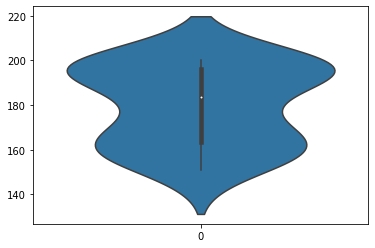

In [8]:
import seaborn as sns
sns.violinplot(sizes)

In [9]:
sns.stripplot(sizes)

<AxesSubplot: >

In [14]:
fig, ax = plt.subplots(1,2)
sns.boxenplot(ax=ax[0], data=sizes)
sns.stripplot(ax=ax[1], data=sizes)

<AxesSubplot: >

(array([1., 2., 5., 0., 1., 0., 1., 1., 2., 7.]),
 array([151. , 155.9, 160.8, 165.7, 170.6, 175.5, 180.4, 185.3, 190.2,
        195.1, 200. ]),
 <BarContainer object of 10 artists>)

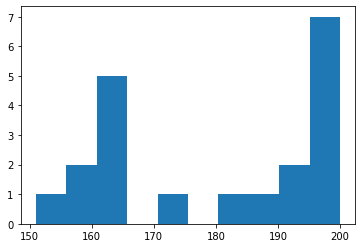

In [16]:
plt.hist(sizes)

([<matplotlib.patches.Wedge at 0x7f46380555d0>,
 [Text(1.0890077416456447, 0.15511975578839934, ''),
  Text(1.0047436370674805, 0.44776134689409186, ''),
  Text(0.8195773283903485, 0.7336845390142408, ''),
  Text(0.5214730572604244, 0.9685379964417845, ''),
  Text(0.20298544231047744, 1.0811091111492956, ''),
  Text(-0.09068612020081461, 1.096255457273953, ''),
  Text(-0.41639863885897194, 1.0181415292366751, ''),
  Text(-0.7376130403179224, 0.8160435054290618, ''),
  Text(-0.9627872692947302, 0.5320156709007704, ''),
  Text(-1.076715481927256, 0.22513056429138423, ''),
  Text(-1.0966784308859916, -0.08541908000815453, ''),
  Text(-1.0168638892481459, -0.4195090353533936, ''),
  Text(-0.8372727047091534, -0.7134244304402667, ''),
  Text(-0.5829383111760892, -0.9328359584424096, ''),
  Text(-0.24530817837169613, -1.0722984181765636, ''),
  Text(0.13273711539911215, -1.0919619307446222, ''),
  Text(0.4950618482065609, -0.9823002425176858, ''),
  Text(0.7947802864791492, -0.76047636138417

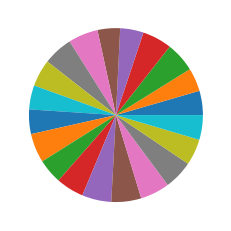

In [17]:
plt.pie(sizes)